In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [100]:
from selenium import webdriver
path_to_chromedriver = '/Users/Sunny/Desktop/chromedriver' # change path as needed
browser = webdriver.Chrome(executable_path = path_to_chromedriver)

In [170]:
url = 'http://siamchart.com/stock-info/INTUCH/'
browser.get(url)

In [199]:
# is it alwasy div 6
data=[]
for tr in browser.find_elements_by_xpath('//*[@id="data_table"]/div[6]/table/tbody/*'):
    tds = tr.find_elements_by_tag_name('td')
    if tds: 
        data.append([td.text for td in tds])        
#click diplayQoQ


#load data QoQ



In [230]:
df=pd.DataFrame(data)
df=df.apply(lambda x: x.replace('',np.nan)).dropna(axis=1,how='all').dropna().set_index(df.columns[0])
df.index = [s.replace('\n','') for s in df.index]
df=df.applymap(lambda x: x[:x.find('\n')])
df.columns = [int(x[:4]) for x in df.ix[0,:]]
df=df[1:].applymap(lambda x: float(x.replace(',',''))).T.sort_index()

In [227]:
df.to_csv('')

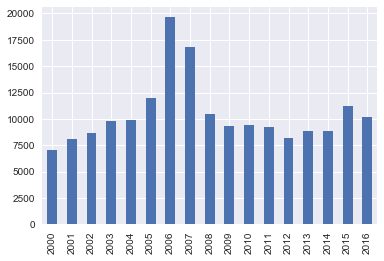

In [236]:
df['รวมค่าใช้จ่าย'].plot(kind='bar')